In [3]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
#import deepwalk as dw

In [4]:
# Importing the datasets
btc_df = pd.read_csv('/Users/pritishmishra/Documents/Computer Science/Artificial Intelligence/Graph Machine Learning/Research_Project/ExplainableEnsembleLinkPredictionMethods/data/raw/soc-sign-bitcoinalpha.csv', header = None)
btc_df.head()

0  1   2           3
0  7188  1  10  1407470400
1   430  1  10  1376539200
2  3134  1  10  1369713600
3  3026  1  10  1350014400
4  3010  1  10  1347854400

In [5]:
grqc_data = pd.read_csv('/Users/pritishmishra/Documents/Computer Science/Artificial Intelligence/Graph Machine Learning/Research_Project/ExplainableEnsembleLinkPredictionMethods/data/raw/ca-GrQc.txt', sep = '\t', skiprows=3)

In [6]:
grqc_data.head()

# FromNodeId  ToNodeId
0          3466       937
1          3466      5233
2          3466      8579
3          3466     10310
4          3466     15931

### Defining visualization class

### Visualizing the General Relativity and Quantum Cosmology Collaboration Network Graph

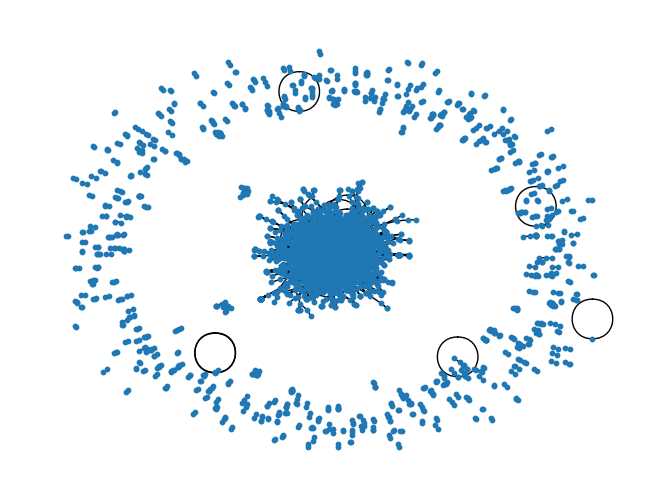

In [5]:
# Create an undirected graph
G = nx.Graph()

# Add edges to the graph
for edge in grqc_data.values:
    source, target = edge
    G.add_edge(source, target)
# Draw the graph
pos = nx.spring_layout(G, seed=42)  # Use a fixed seed for reproducibility
nx.draw(G, pos, node_size=10, with_labels=False)

# Display the plot
plt.show()






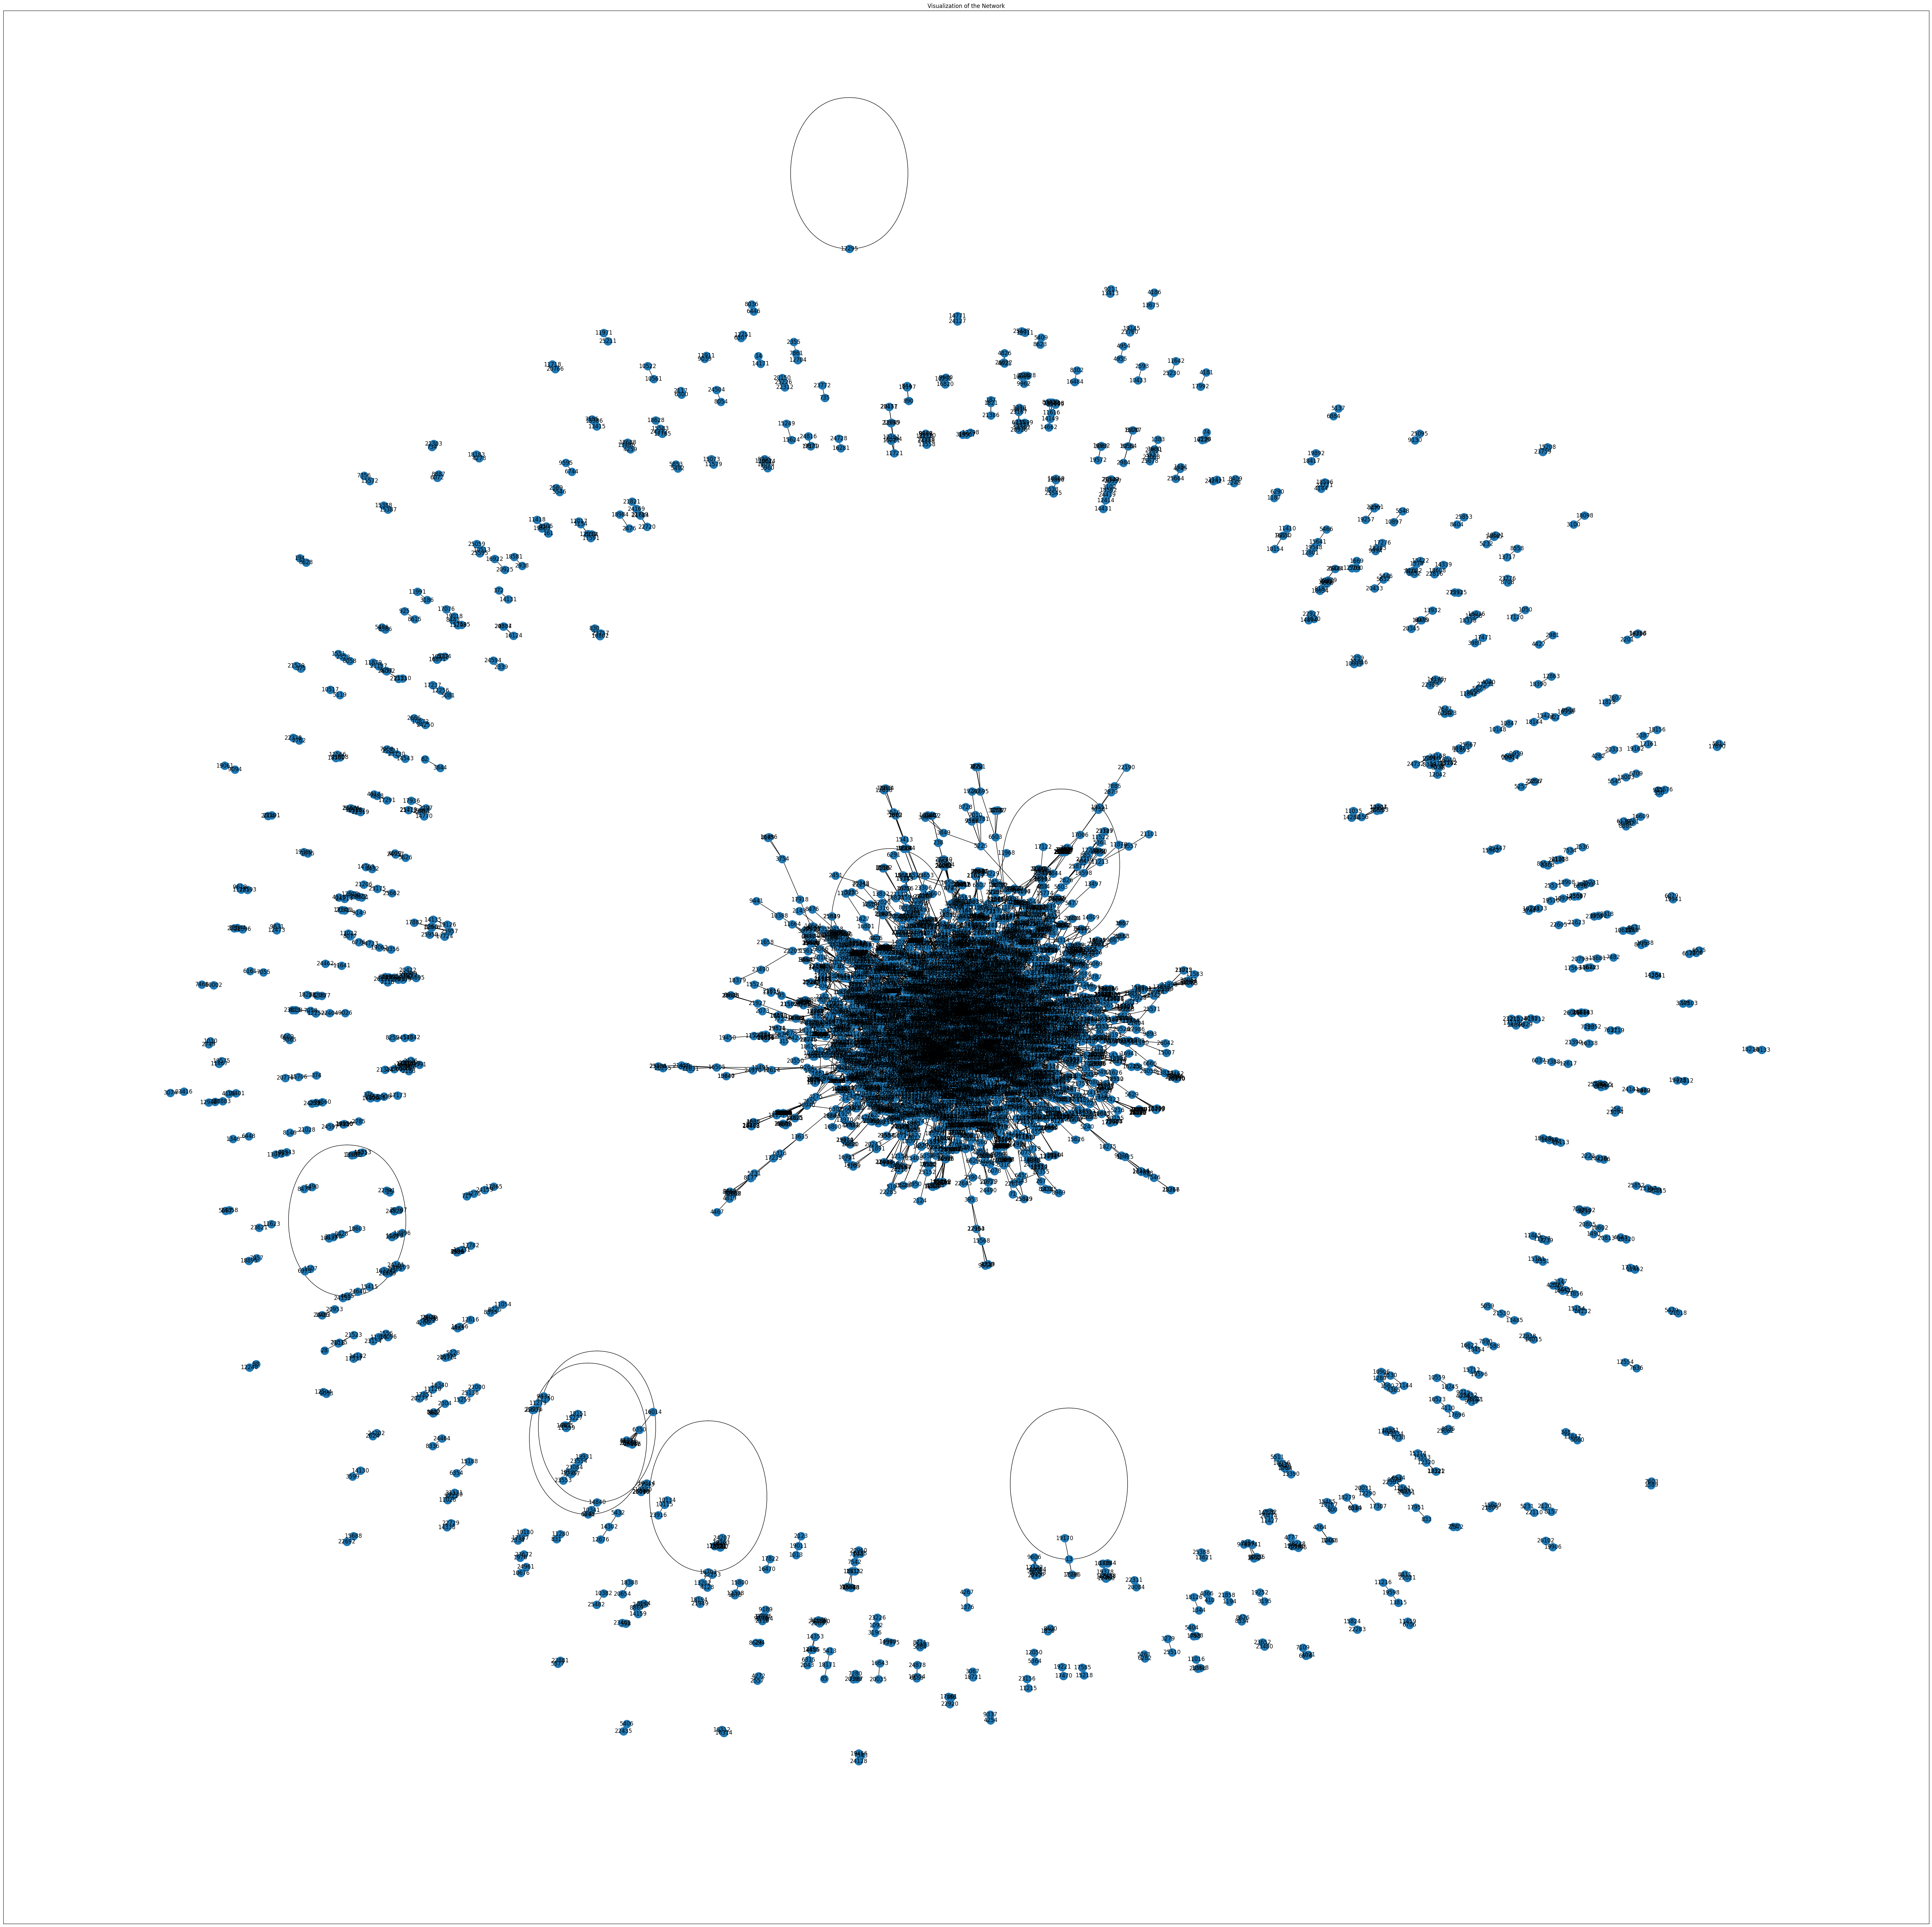

In [6]:
class GViz:

    def __init__(self):
        
        self.visual = []
    
    def add_edge(self, a, b):
        self.visual.append((a, b))
    
    def visualize(self):
        G = nx.Graph()
        plt.figure(figsize=(75,75))
        G.add_edges_from(self.visual)
        nx.draw_networkx(G)
        plt.title("Visualization of the Network")
        plt.show()

gn = "General Relativity and Quantum Cosmology Collaboration"
G = GViz()
for i in range(len(grqc_data)):
    G.add_edge(grqc_data.iloc[i,0], grqc_data.iloc[i,1])
G.visualize()

## Visualizing the Bitcoin Alpha Network Graph

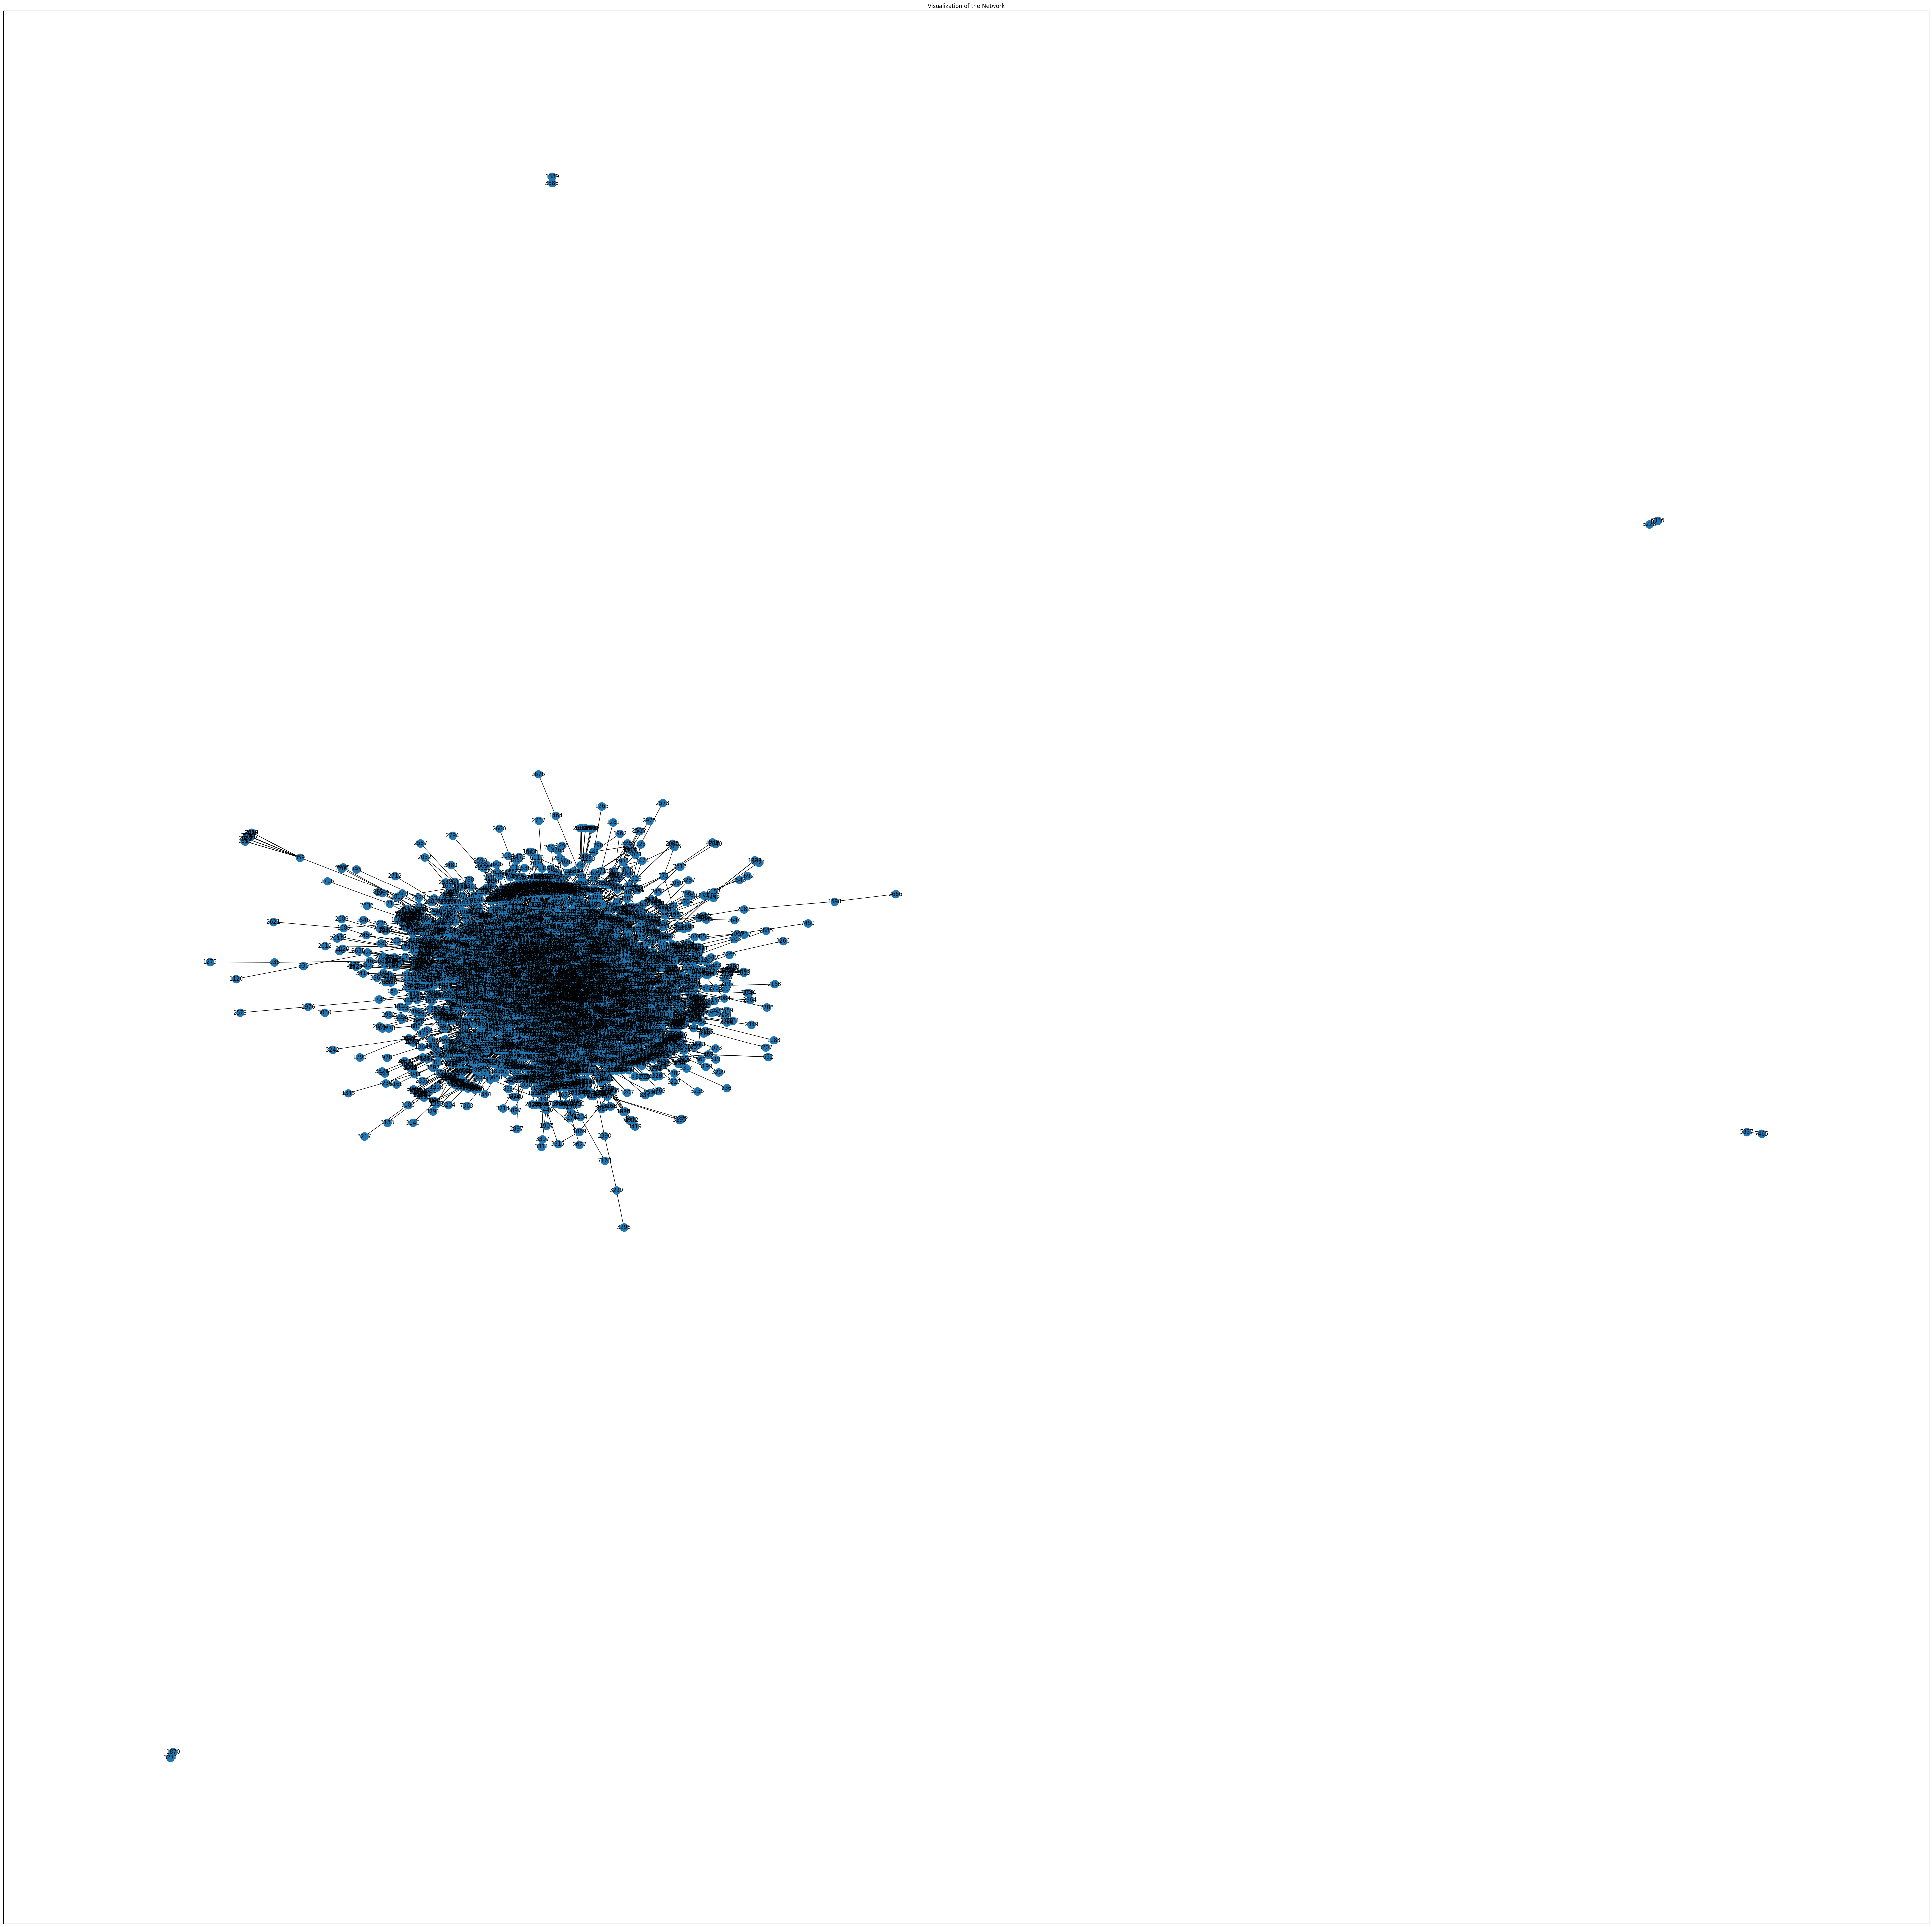

In [7]:
G = GViz()
for i in range(len(btc_df)):
    G.add_edge(btc_df.iloc[i,0], btc_df.iloc[i,1])
G.visualize()

In [8]:
grqc_data.columns

Index(['# FromNodeId', 'ToNodeId'], dtype='object')

In [7]:
 # Create a graph
G = nx.Graph()

# Add edges to the graph
# ... add your edges here ...

# Compute the degree distribution
out_degree_sequence = grqc_data['# FromNodeId'].value_counts().values
out_degree_counts = np.bincount(out_degree_sequence)

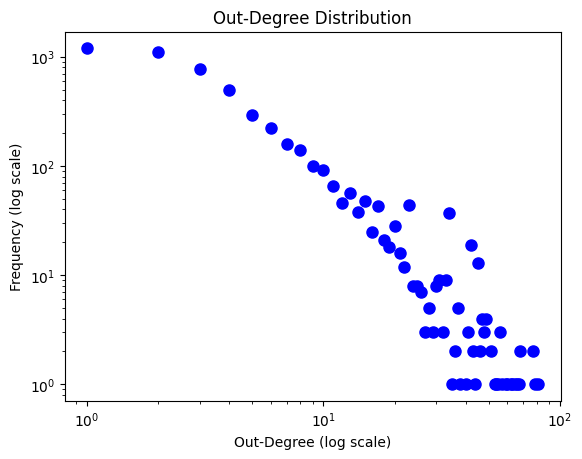

In [8]:
plt.loglog(range(len(out_degree_counts)), out_degree_counts, 'bo', markersize=8)
plt.xlabel('Out-Degree (log scale)')
plt.ylabel('Frequency (log scale)')
plt.title('Out-Degree Distribution')
plt.show()


In [9]:
btc_df.columns

Index([0, 1, 2, 3], dtype='int64')

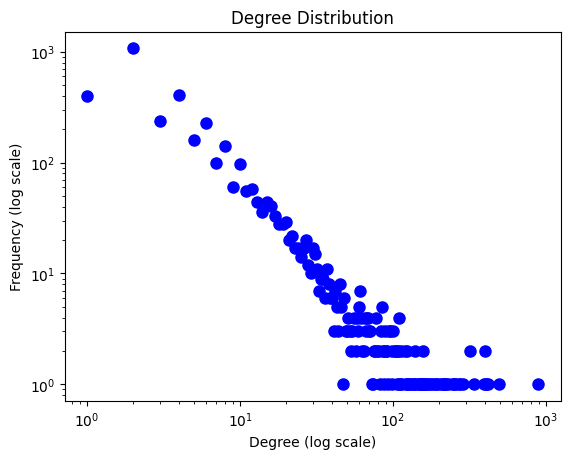

In [10]:
# Compute the degree distribution
degree_sequence = pd.concat([btc_df[0], btc_df[1]]).value_counts().values
degree_counts = np.bincount(degree_sequence)

# Plot the degree distribution in log-log scale
plt.loglog(range(len(degree_counts)), degree_counts, 'bo', markersize=8)
plt.xlabel('Degree (log scale)')
plt.ylabel('Frequency (log scale)')
plt.title('Degree Distribution')
plt.show()


In [11]:
from collections import defaultdict

# Initialize the adjacency list as a defaultdict with lists as default values
adjacency_list = defaultdict(list)

# Iterate through the edges and add them to the adjacency list
for source, target in grqc_data.values:
    adjacency_list[source].append(target)
    adjacency_list[target].append(source)  # Since the graph is undirected

In [14]:
import networkx as nx
from random import Random
import deepwalk.graph

G = nx.Graph(adjacency_list)

dw_g = deepwalk.graph.Graph(G.number_of_nodes())
for edge in G.edges:
    dw_g[int(edge[0])].append(int(edge[1]))

def generate_walks(graph, num_walks, walk_length, seed=None):
    random = Random(seed)
    walks = []
    nodes = list(graph.nodes())

    for _ in range(num_walks):
        random.shuffle(nodes)
        for node in nodes:
            walk = graph.random_walk(walk_length, node, random)
            walks.append([str(n) for n in walk])

    return walks

from gensim.models import Word2Vec

walks = generate_walks(dw_g, num_walks=10, walk_length=40, seed=42)
model = Word2Vec(walks, size=128, window=5, min_count=0, sg=1, hs=1, workers=4, seed=42)
node_embeddings = {str(node): model.wv[str(node)] for node in G.nodes}


ModuleNotFoundError: No module named 'deepwalk.graph'; 'deepwalk' is not a package

In [ ]:
import networkx as nx
import random
from gensim.models import Word2Vec

def random_walk(G, node, walk_length, seed=None):
    random.seed(seed)
    walk = [node]
    for _ in range(walk_length - 1):
        neighbors = list(G.neighbors(walk[-1]))
        if not neighbors:
            break
        walk.append(random.choice(neighbors))
    return walk

def generate_walks(G, num_walks, walk_length, seed=None):
    walks = []
    nodes = list(G.nodes)
    for _ in range(num_walks):
        random.seed(seed)
        random.shuffle(nodes)
        for node in nodes:
            walk = random_walk(G, node, walk_length, seed)
            walks.append(walk)
    return walks

# Convert the adjacency list to a NetworkX graph
G = nx.Graph(adjacency_list)

# Generate random walks
walks = generate_walks(G, num_walks=10, walk_length=40, seed=42)

# Train a Word2Vec model on the random walks
model = Word2Vec(walks, vector_size=128, window=5, min_count=0, sg=1, hs=1, workers=4, seed=42)

# Get the node embeddings
node_embeddings = {str(node): model.wv[str(node)] for node in G.nodes}


In [12]:
import networkx as nx
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.models.callbacks import CallbackAny2Vec
from node2vec import Node2Vec

# Convert the adjacency list to a NetworkX graph
G = nx.Graph(adjacency_list)

# Set the node2vec hyperparameters
p = 1  # Return hyperparameter
q = 1  # In-out hyperparameter
dimensions = 128  # Dimensionality of node embeddings
walk_length = 40  # Length of each random walk
num_walks = 10  # Number of random walks from each node
workers = 4  # Number of parallel workers

# Generate the node2vec random walks
node2vec = Node2Vec(G, dimensions=dimensions, walk_length=walk_length, num_walks=num_walks, p=p, q=q, workers=workers)
walks = node2vec.walks

# Train a Word2Vec model on the random walks to generate node embeddings
model = Word2Vec(walks, vector_size=dimensions, window=5, min_count=0, sg=1, hs=1, workers=workers, seed=42)

# Get the node embeddings
node_embeddings = {str(node): model.wv[str(node)] for node in G.nodes}

# Save the node embeddings to a file
model.wv.save_word2vec_format('node_embeddings.txt')


/Users/pritishmishra/opt/anaconda3/envs/torch_gpu_arm64/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]


In [ ]:
#